In [2]:
import numpy as np
import pandas as pd

In [3]:
df= pd.read_csv('spam.csv' ,encoding=('ISO-8859-1'))

In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2046,ham,"Aight fuck it, I'll get it later",NaN,NaN,NaN
3654,ham,Senthil group company Apnt 5pm.,NaN,NaN,NaN
1054,ham,HIYA COMIN 2 BRISTOL 1 ST WEEK IN APRIL. LES G...,NaN,NaN,NaN
2684,ham,Yupz... I've oredi booked slots 4 my weekends ...,NaN,NaN,NaN
3991,ham,"Dizzamn, aight I'll ask my suitemates when I g...",NaN,NaN,NaN


In [5]:
df.shape


(5572, 5)

## 1.Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
#dropping last 3 cloumns because of maxm null values

In [8]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
df.sample(10)

,v1,v2
5232,spam,YOU ARE CHOSEN TO RECEIVE A å£350 AWARD! Pls c...
3439,ham,What time you thinkin of goin?
1621,ham,Living is very simple.. Loving is also simple....
846,ham,My stomach has been thru so much trauma I swea...
4582,spam,For ur chance to win a å£250 wkly shopping spr...
2660,ham,Want to finally have lunch today?
349,ham,Just checking in on you. Really do miss seeing...
1311,ham,U r too much close to my heart. If u go away i...
3394,ham,Then i buy.
1172,ham,Happy new years melody!


In [10]:
#renaming the columns

In [11]:
df.rename(columns={'v1':'result','v2':'text'},inplace=True)
df.sample(7)

,result,text
182,ham,ok. I am a gentleman and will treat you with d...
3021,ham,How dare you change my ring
4485,ham,have * good weekend.
394,ham,Pick you up bout 7.30ish? What time are and t...
3367,ham,"Hey elaine, is today's meeting still on?"
4375,spam,"If you don't, your prize will go to another cu..."
3202,ham,Haha... Yup hopefully we will lose a few kg b...


In [12]:
#renaming spam ham into no

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [14]:
df['result']=encoder.fit_transform(df['result'])

In [15]:
df.sample(5)

,result,text
4724,0,There'll be a minor shindig at my place later ...
1180,0,I'm in chennai velachery:)
4324,0,Am only searching for good dual sim mobile pa.
3782,0,Can you do online transaction?
292,0,Oops. 4 got that bit.


In [16]:
#checking missing values
df.isnull().sum()

result    0
text      0
dtype: int64

In [17]:
#checking for duplicate values if any
df.duplicated().sum()

403

In [18]:
#removing duplicates
df=df.drop_duplicates(keep='first')

In [19]:
df.duplicated().sum()

0

In [20]:
df.shape

(5169, 2)

## 2.EDA

In [21]:
#lets count no of spam and ham i.e (Classification)
df['result'].value_counts()

result
0    4516
1     653
Name: count, dtype: int64

In [22]:
#lets see it more mathematically

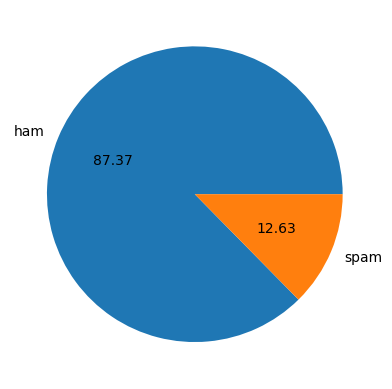

In [23]:
import matplotlib.pyplot as plt
plt.pie(df['result'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [24]:
#from above data we can conclude our data set is imbalanced

In [25]:
!pip install nltk

In [26]:
import nltk

In [27]:
pd.options.mode.chained_assignment = None  # default='warn'

In [28]:
df['num_characters']=df['text'].apply(len)

In [29]:
df.head()

,result,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [30]:
#fetching no of words

In [31]:
df['text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [32]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/buddhi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [33]:
df['num_words']= df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [34]:
df.head()

,result,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [35]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [36]:
df.head()

,result,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [37]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [38]:
#ham
df[df['result']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [39]:
#spam
df[df['result']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [40]:
df.head()

,result,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [41]:
import seaborn as sns

/Users/buddhi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/buddhi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_characters', ylabel='Count'>

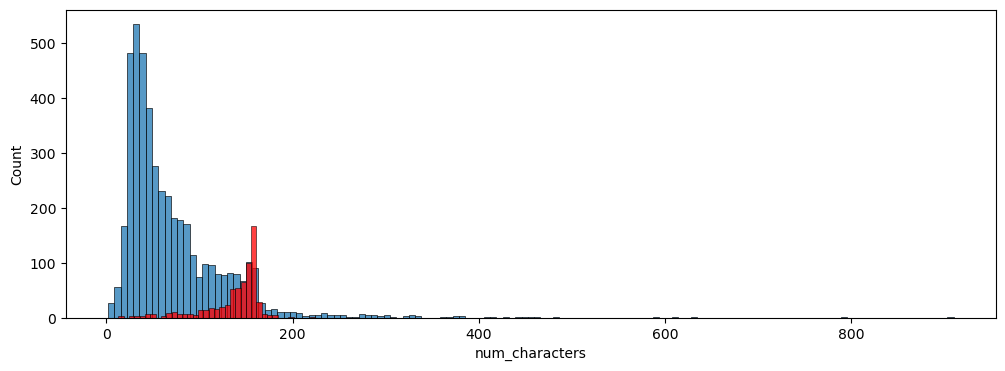

In [42]:
plt.figure(figsize=(12,4))
sns.histplot(df[df['result']==0]['num_characters'])
sns.histplot(df[df['result']==1]['num_characters'],color='red')

/Users/buddhi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/buddhi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_words', ylabel='Count'>

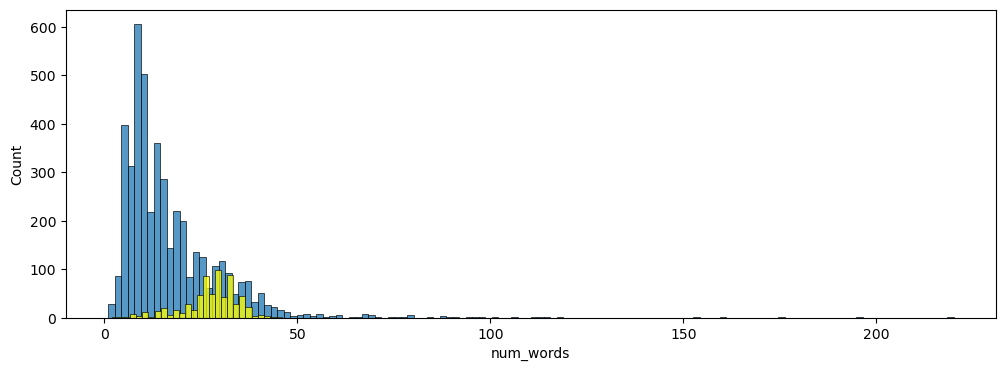

In [43]:
plt.figure(figsize=(12,4))
sns.histplot(df[df['result']==0]['num_words'])
sns.histplot(df[df['result']==1]['num_words'],color='yellow')

/Users/buddhi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/buddhi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/buddhi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


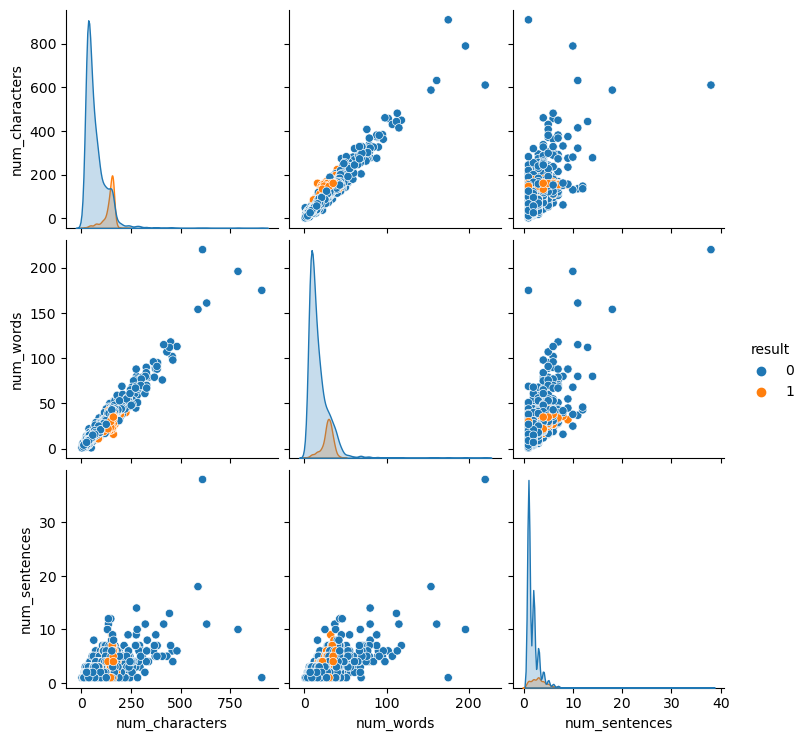

In [44]:
sns.pairplot(df,hue='result')

In [45]:
df.corr(numeric_only = True)

,result,num_characters,num_words,num_sentences
result,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

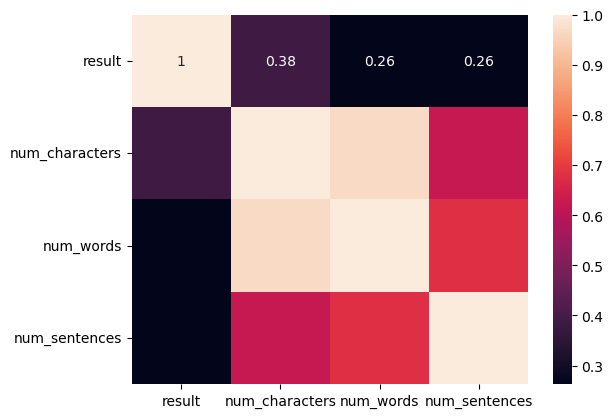

In [46]:
sns.heatmap(df.corr(numeric_only = True),annot=True)

## 3.Data Preprocessing

In [47]:
from nltk.corpus import stopwords
import string
string.punctuation

from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()


def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    #removing characters other than alphanumeric
    y=[]
    for i in text:
      if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    
    #removing stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english')and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()  
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [48]:
#example of fxn

In [49]:
transform_text("'I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [50]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [51]:
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
ps.stem('dancing')

'danc'

In [52]:
df["Processed_text"]=df['text'].apply(transform_text)

In [53]:
df.head()

,result,text,num_characters,num_words,num_sentences,Processed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [54]:
#forming word cloud

In [55]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [56]:
spam_wc= wc.generate(df[df['result']==1]['Processed_text'].str.cat(sep=" "))

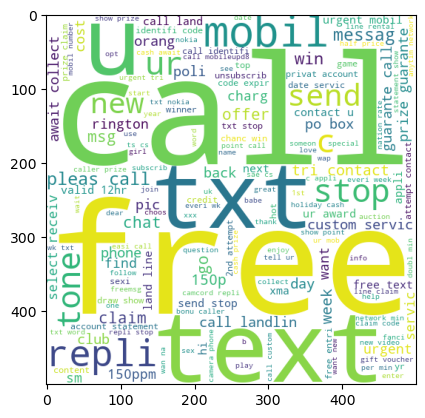

In [57]:
plt.imshow(spam_wc)

In [58]:
ham_wc= wc.generate(df[df['result']==0]['Processed_text'].str.cat(sep=" "))

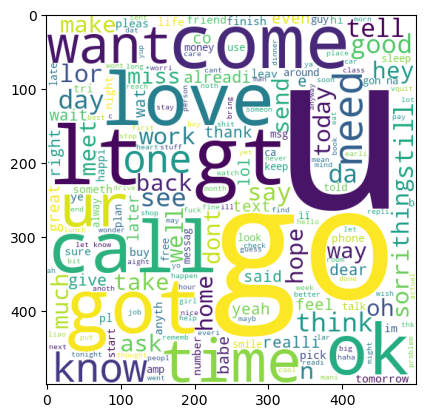

In [59]:
plt.imshow(ham_wc)

In [60]:
#finding top 30 words

In [61]:
spam_corpus=[]
for msg in df[df['result']==1]['Processed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [62]:
len(spam_corpus)

9939

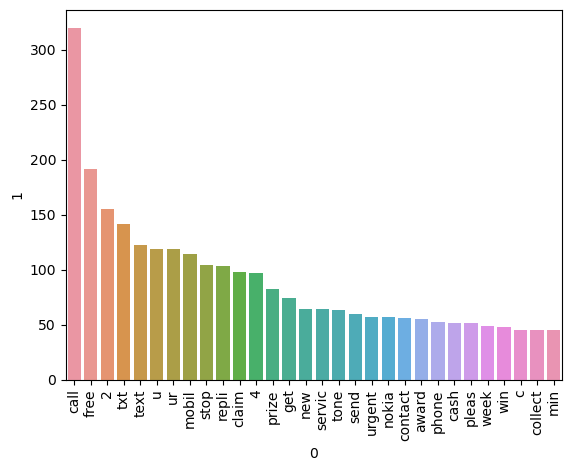

In [63]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [64]:
ham_corpus=[]
for msg in df[df['result']==0]['Processed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [65]:
len (ham_corpus)

35404

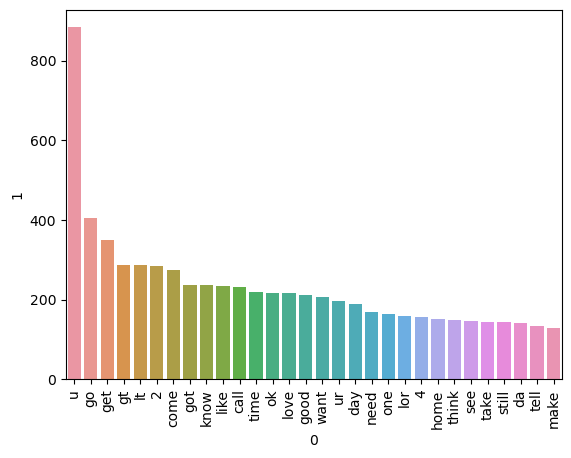

In [66]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## 4.Data Modeling

In [67]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [68]:
X = tfidf.fit_transform(df['Processed_text']).toarray()

In [117]:
print(X)
X.shape


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(5169, 3000)

In [112]:
y = df['result'].values
print(y)

[0 0 1 ... 0 0 0]


In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [73]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [74]:
gnb = GaussianNB()
mnb = BernoulliNB()
bnb = BernoulliNB()

In [75]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [76]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [77]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [78]:
#we used tfidf --> MNB because it's precision was best

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [80]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
(mnb.fit(X_train,y_train))
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [81]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [82]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [83]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [84]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9303675048355899
Precision -  0.8173076923076923
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9333333333333333


In [85]:
#lets see these more graphically

In [86]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [87]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.967118,0.933333
6,AdaBoost,0.960348,0.929204
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [88]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [89]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,xgb,Accuracy,0.967118
7,AdaBoost,Accuracy,0.960348
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


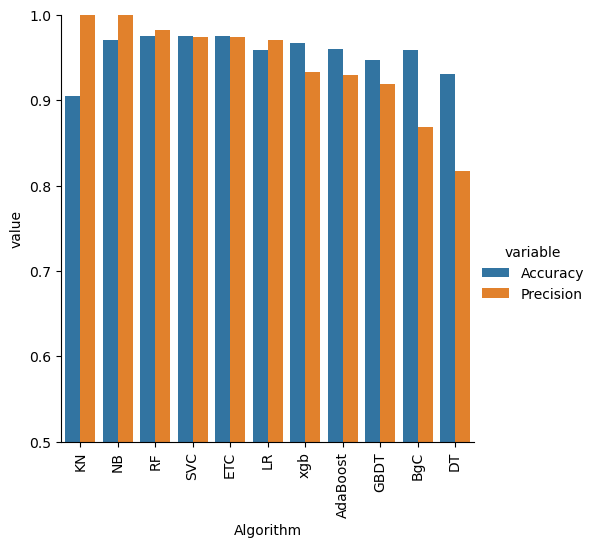

In [90]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [91]:
#improving the model

In [92]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [93]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [94]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [95]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [96]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [97]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,xgb,0.967118,0.933333,0.967118,0.933333,0.967118,0.933333,0.967118,0.933333
7,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
8,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
9,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217


In [98]:
#lets try other models

In [99]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [100]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [101]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [102]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [103]:
#precision has decreased than NB lets apply stacking now

In [104]:
# Applying stacking

In [105]:
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [106]:
from sklearn.ensemble import StackingClassifier

In [107]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [108]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9465648854961832


In [118]:
clf =MultinomialNB()
clf.fit(X,y)

MultinomialNB()

In [109]:
#precision is more worse so I finalize NB as my model

In [119]:

import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))